<a href="https://colab.research.google.com/github/AshishDavid/ML-Course-2022/blob/main/Physical%20Exercise%20Recognition/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! wget https://raw.githubusercontent.com/AshishDavid/ML-Course-2022/main/Physical%20Exercise%20Recognition/exercise.csv

--2022-12-23 09:36:56--  https://raw.githubusercontent.com/AshishDavid/ML-Course-2022/main/Physical%20Exercise%20Recognition/exercise.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1135482 (1.1M) [text/plain]
Saving to: ‘exercise.csv’

exercise.csv        100%[===================>]   1.08M  --.-KB/s    in 0.008s  

2022-12-23 09:36:57 (136 MB/s) - ‘exercise.csv’ saved [1135482/1135482]



This dataset represents 10 different physical poses that can be used to distinguish 5 exercises. The exercises are Push-up, Pull-up, Sit-up, Jumping Jack and Squat.

In [420]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
df = pd.read_csv("exercise.csv")
dataset = df.values

In [421]:
df.tail()

,pose_id,pose,x_nose,y_nose,z_nose,x_left_eye_inner,y_left_eye_inner,z_left_eye_inner,x_left_eye,y_left_eye,...,z_left_heel,x_right_heel,y_right_heel,z_right_heel,x_left_foot_index,y_left_foot_index,z_left_foot_index,x_right_foot_index,y_right_foot_index,z_right_foot_index
1092,1092,situp_up,-25.679585,-47.380875,-5.901453,-25.139788,-51.002510,-10.440426,-24.879524,-51.218052,...,14.827999,-55.717426,-0.799386,48.414420,-59.586680,-16.158272,1.463939,-56.319120,-17.240007,40.646820
1093,1093,jumping_jacks_up,-1.185803,-51.386070,-31.526268,-0.436185,-53.642360,-28.797546,0.175695,-53.750496,...,8.130944,-12.678401,47.509556,62.822067,17.710821,51.948390,-14.776978,-17.019627,49.782352,47.884693
1094,1094,pullups_down,-4.307419,-49.337822,7.097422,-4.982467,-51.214745,9.683287,-5.098945,-51.260090,...,-22.450487,35.971850,14.499550,-48.723770,36.879860,-5.513745,-34.270077,39.437458,0.077004,-62.674248
1095,1095,situp_down,-41.915108,-1.429882,-64.905620,-43.944553,-5.871200,-69.808044,-43.605865,-7.228406,...,-111.222755,-39.931140,4.812771,-106.005490,15.440416,-9.404089,-123.269000,-52.717530,-15.088408,-111.827450
1096,1096,jumping_jacks_up,-0.599986,-52.802720,-33.876865,0.146288,-54.501133,-30.398746,0.676095,-54.379950,...,47.483240,-12.783580,43.284570,41.065197,13.308356,48.930042,29.690600,-13.368079,48.808500,23.406100


{2.0501401: 1, 59.75007: 1, -40.51983: 1, 20.34311: 1, 45.503677: 1, 59.527676: 1, 43.244614: 1, 11.914433: 1, 45.16685: 1, -20.664228: 1, -22.874006: 1, -48.458588: 1, -17.250923: 1, -85.87128: 1, 24.976854: 1, 218.76949: 1, -18.8768: 1, 37.11023: 1, 67.48827: 1, 27.826202: 1, 26.691675: 1, 23.074781: 1, -21.594507: 1, -3.5525002: 1, -35.97076: 1, 29.933002: 1, 181.48232: 1, -85.39084: 1, 1.8422468: 1, -28.28713: 1, 17.664902: 1, -46.524017: 1, -8.132299: 1, 73.8576: 1, -24.747795: 1, -1.4874805: 1, -28.356133: 1, -87.84838: 1, -5.3201714: 1, 0.4445495: 1, 19.672213: 1, -12.128962: 1, -45.477436: 1, 231.09216: 1, 234.22021: 1, 195.77588: 1, -79.37987: 1, 20.460594: 1, 25.539785: 1, -126.40915: 1, 72.23328: 1, 88.7277: 1, 19.793774: 1, -46.99818: 1, -14.171271: 1, -6.8852453: 1, -9.928796: 1, -12.928685: 1, -22.460163: 1, 186.88042: 1, 21.75257: 1, 40.3732: 1, -66.99962: 1, -25.615427: 1, -20.671234: 1, -63.064148: 1, -226.15862: 1, -44.101845: 1, 1.0884554: 1, 146.03433: 1, -10.277109

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


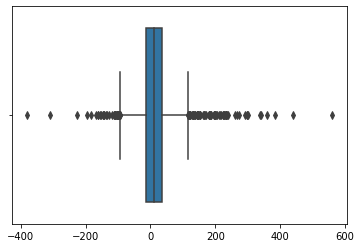

In [422]:
import seaborn as sns
sns.boxplot(dataset[:, 100])
count = {}
for i in dataset[:, 100]:
  count[i] = count.get(i, 0) + 1
print(count)

In [423]:
df['pose'].value_counts()

jumping_jacks_down    151
jumping_jacks_up      145
pullups_down          123
pushups_up            115
squats_up             111
pullups_up            108
squats_down           101
situp_down             82
pushups_down           82
situp_up               79
Name: pose, dtype: int64

In [424]:
X = df.drop(['pose_id', 'pose'], axis='columns')
y = df['pose']

In [425]:
from sklearn.preprocessing import LabelEncoder
y=LabelEncoder().fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
print(X)
print(y.shape)

         x_nose     y_nose     z_nose  x_left_eye_inner  y_left_eye_inner  \
0     -0.382815 -48.231250 -54.405792          0.137189        -50.040543   
1     54.146880 -12.822491   5.564175         56.762527        -11.221117   
2      9.891440 -54.147266  85.344970         12.784414        -55.229970   
3      0.904673 -51.350130 -33.606970          1.338871        -53.172337   
4     -3.153129 -55.255062 -17.745928         -2.046205        -57.477790   
...         ...        ...        ...               ...               ...   
1092 -25.679585 -47.380875  -5.901453        -25.139788        -51.002510   
1093  -1.185803 -51.386070 -31.526268         -0.436185        -53.642360   
1094  -4.307419 -49.337822   7.097422         -4.982467        -51.214745   
1095 -41.915108  -1.429882 -64.905620        -43.944553         -5.871200   
1096  -0.599986 -52.802720 -33.876865          0.146288        -54.501133   

      z_left_eye_inner  x_left_eye  y_left_eye  z_left_eye  x_left_eye_oute

In [375]:
def IQR_Outliers_detection (X, features):

    print('# of features: ', len(features))
    print('Features: ', features)

    indices = [x for x in X.index]
    #print(indices)
    print('Number of samples: ', len(indices))
    
    out_indexlist = []
        
    for col in features:
       
        #Using nanpercentile instead of percentile because of 
        Q1 = np.nanpercentile(X[col], 25.)
        Q3 = np.nanpercentile(X[col], 75.)
        
        cut_off = (Q3 - Q1) * 1.5
        upper, lower = Q3 + cut_off, Q1 - cut_off
        print ('\nFeature: ', col)
        print ('Upper and Lower limits: ', upper, lower)
                
        outliers_index = X[col][(X[col] < lower) | (X[col] > upper)].index.tolist()
        outliers = X[col][(X[col] < lower) | (X[col] > upper)].values
        print('Number of outliers: ', len(outliers))
        print('Outliers Index: ', outliers_index)
        print('Outliers: ', outliers)
        
        out_indexlist.extend(outliers_index)
        out_indexlist = list(set(out_indexlist))
        out_indexlist.sort()
        print('\nNumber of rows with outliers: ', len(out_indexlist))
        print('List of rows with outliers: ', out_indexlist)
    #using set to remove duplicates
IQR_Outliers_detection(X, df.columns)

# of features:  99
Features:  Index(['x_nose', 'y_nose', 'z_nose', 'x_left_eye_inner', 'y_left_eye_inner',
       'z_left_eye_inner', 'x_left_eye', 'y_left_eye', 'z_left_eye',
       'x_left_eye_outer', 'y_left_eye_outer', 'z_left_eye_outer',
       'x_right_eye_inner', 'y_right_eye_inner', 'z_right_eye_inner',
       'x_right_eye', 'y_right_eye', 'z_right_eye', 'x_right_eye_outer',
       'y_right_eye_outer', 'z_right_eye_outer', 'x_left_ear', 'y_left_ear',
       'z_left_ear', 'x_right_ear', 'y_right_ear', 'z_right_ear',
       'x_mouth_left', 'y_mouth_left', 'z_mouth_left', 'x_mouth_right',
       'y_mouth_right', 'z_mouth_right', 'x_left_shoulder', 'y_left_shoulder',
       'z_left_shoulder', 'x_right_shoulder', 'y_right_shoulder',
       'z_right_shoulder', 'x_left_elbow', 'y_left_elbow', 'z_left_elbow',
       'x_right_elbow', 'y_right_elbow', 'z_right_elbow', 'x_left_wrist',
       'y_left_wrist', 'z_left_wrist', 'x_right_wrist', 'y_right_wrist',
       'z_right_wrist', 'x_left_

In [426]:
from sklearn.svm import SVC
svm = SVC().fit(X_train, y_train)
#accuracy before normalization
print(svm.score(X_test, y_test))

0.7382920110192838


Half of the data has been marked as outliers. But in this particular dataset, we don't need to remove outliers, as every row denotes a position of physical activity.

In [427]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
#Without normalization accuracy
print(knn.score(X_test, y_test))

0.7630853994490359


In [428]:
from sklearn.tree import DecisionTreeClassifier
decisiontree = DecisionTreeClassifier(random_state=0).fit(X_train, y_train)
#before normalization
print(decisiontree.score(X_test, y_test))

0.699724517906336


In [429]:
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [430]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

#normalization accuracy
print(knn.score(X_test, y_test))

0.8181818181818182


In [431]:
from sklearn.svm import SVC
svm = SVC().fit(X_train, y_train)
#after normalization accuracy
print(svm.score(X_test, y_test))

0.768595041322314


In [432]:
from sklearn.tree import DecisionTreeClassifier
decisiontree = DecisionTreeClassifier(random_state=0).fit(X_train, y_train)
#after normalization accuracy
print(decisiontree.score(X_test, y_test))

0.699724517906336


In [433]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=45)

for train_index, test_index in kf.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

TRAIN: [  25   26   27 ... 1094 1095 1096] TEST: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24]
TRAIN: [   0    1    2 ... 1094 1095 1096] TEST: [25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49]
TRAIN: [   0    1    2 ... 1094 1095 1096] TEST: [50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73
 74]
TRAIN: [   0    1    2 ... 1094 1095 1096] TEST: [75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98
 99]
TRAIN: [   0    1    2 ... 1094 1095 1096] TEST: [100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117
 118 119 120 121 122 123 124]
TRAIN: [   0    1    2 ... 1094 1095 1096] TEST: [125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142
 143 144 145 146 147 148 149]
TRAIN: [   0    1    2 ... 1094 1095 1096] TEST: [150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167
 168 169 170 171 172 173 174]
TRAIN: [   0    1    2 ... 1094 1095

In [434]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

#after normalization and k-fold cross validation accuracy
print(knn.score(X_test, y_test))

0.8333333333333334


In [435]:
from sklearn.svm import SVC
svm = SVC().fit(X_train, y_train)
#after normalization accuracy and k-fold cross validation accuracy
print(svm.score(X_test, y_test))

0.6666666666666666


In [436]:
from sklearn.tree import DecisionTreeClassifier
decisiontree = DecisionTreeClassifier(random_state=0).fit(X_train, y_train)
#after normalization accuracy and k-fold cross validation accuracy
print(decisiontree.score(X_test, y_test))

0.625


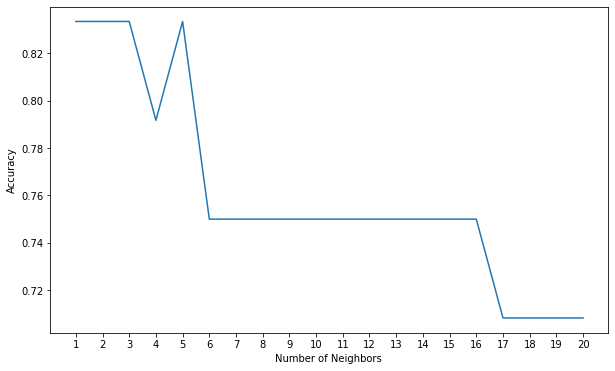

In [437]:
from sklearn import metrics
mean_acc = np.zeros(20)
for i in range(1,21):
    #Train Model and Predict  
    knn = KNeighborsClassifier(n_neighbors = i).fit(X_train,y_train)
    yhat= knn.predict(X_test)
    mean_acc[i-1] = metrics.accuracy_score(y_test, yhat)

loc = np.arange(1,21,step=1.0)
plt.figure(figsize = (10, 6))
plt.plot(range(1,21), mean_acc)
plt.xticks(loc)
plt.xlabel('Number of Neighbors ')
plt.ylabel('Accuracy')
plt.show()

In [453]:
#Using GridSearchCV to find the optimal hyperaparameters for Knn
from sklearn.model_selection import GridSearchCV
grid_params = { 'n_neighbors' : [3,5,7,9,11,13,15],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}
gs = GridSearchCV(KNeighborsClassifier(), grid_params, verbose = 1, cv=20, n_jobs = -1)
g_res = gs.fit(X_train, y_train)
print(g_res.best_score_)
print(g_res.best_params_)
knn = gs.fit(X_train, y_train)
y_hat = knn.predict(X_train)
y_knn = knn.predict(X_test)
print('Training set accuracy: ', metrics.accuracy_score(y_train, y_hat))
print('Test set accuracy: ',metrics.accuracy_score(y_test, y_knn))

Fitting 20 folds for each of 42 candidates, totalling 840 fits
0.835150244584207
{'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}
Fitting 20 folds for each of 42 candidates, totalling 840 fits
Training set accuracy:  1.0
Test set accuracy:  0.875


In [389]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(knn, X_train, y_train, cv=10)
print('Cross-Validation Accuracy Scores', scores)

Cross-Validation Accuracy Scores [0.7962963  0.80555556 0.76851852 0.77570093 0.82242991 0.76635514
 0.8411215  0.76635514 0.87850467 0.81308411]


In [439]:
from sklearn.decomposition import PCA
pca=PCA(n_components=14)
pca.fit(X)
X_pca=pca.transform(X)

In [440]:
X_train_pca, X_test_pca, y_train_pca, y_test_pca=train_test_split(X_pca, y, test_size=0.33)

In [441]:
print(X_pca.shape)

(1097, 14)


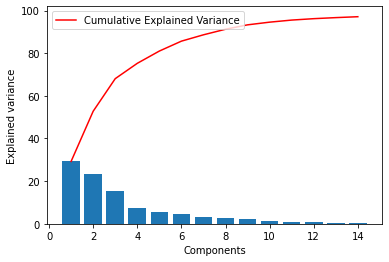

In [442]:
plt.bar(range(1,len(pca.explained_variance_ )+1),pca.explained_variance_ )
plt.ylabel('Explained variance')
plt.xlabel('Components')
plt.plot(range(1,len(pca.explained_variance_ )+1),
         np.cumsum(pca.explained_variance_),
         c='red',
         label="Cumulative Explained Variance")
plt.legend(loc='upper left')

In [443]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_pca, y_train_pca)
#accuracy after using only 14 features
print(knn.score(X_test_pca, y_test_pca))

0.8154269972451791


In [444]:
scores = cross_val_score(knn, X_train_pca, y_train_pca, cv=10)
print('Cross-Validation Accuracy Scores', scores)

Cross-Validation Accuracy Scores [0.85135135 0.77027027 0.82432432 0.77027027 0.71232877 0.78082192
 0.82191781 0.79452055 0.84931507 0.87671233]


In [456]:
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(X_train, y_train)
svcb = grid.fit(X_train, y_train)
y_hat = svcb.predict(X_train)
y_knn = svcb.predict(X_test)
print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)
print('Training set accuracy: ', metrics.accuracy_score(y_train, y_hat))
print('Test set accuracy: ',metrics.accuracy_score(y_test, y_knn))

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.209 total time=   0.2s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.247 total time=   0.2s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.177 total time=   0.2s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.220 total time=   0.2s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.229 total time=   0.2s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.414 total time=   0.1s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.400 total time=   0.1s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.437 total time=   0.1s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.458 total time=   0.1s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.458 total time=   0.1s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.577 total time=   0.1s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

Report: I tried to predict the position of the Physical Exercise position using LogisticRegression, Knn and SVC. The highest accuracy I got is with Knn which is 87%. 